### Load packages

In [1]:
import os, sys
import numpy as np
import pandas as pd
from glob import glob 
from skimage.io import imread, imsave
import zarr
import napari
import seaborn as sns
import matplotlib.pyplot as plt
# import nrrd
import tifffile

### Start Napari viewer

In [2]:
%gui qt
napari.gui_qt()
viewer = napari.Viewer(ndisplay=3)

In [3]:
inputdir = "/Users/fangmingxie/data/viz_sparse06_v3/"

f_tiff = "/Users/fangmingxie/data/viz_sparse06_v3/c00_s1.tiff"
f_spot = "/Users/fangmingxie/data/viz_sparse06_v3/spots_c00.txt"

f_tiff2 = "/Users/fangmingxie/data/viz_sparse06_v3/c0_bs_s1.tiff"
f_spot2 = "/Users/fangmingxie/data/viz_sparse06_v3/spots_c0_bs.txt"

In [4]:
scaling = np.array([0.23, 0.23, 0.42])*np.array([2, 2, 1])
scaling

array([0.46, 0.46, 0.42])

In [5]:
img = tifffile.imread(f_tiff)
zdim, ydim, xdim = img.shape
zdim, ydim, xdim

(2837, 960, 960)

In [6]:
img2 = tifffile.imread(f_tiff2)
img2.shape

(2837, 960, 960)

In [7]:
df = pd.read_csv(f_spot, header=None)
df

,0,1,2,3
0,160.997979,31.006853,35.405453,200.2292
1,166.972643,34.831017,21.852137,199.2449
2,167.146247,7.873360,24.368903,196.3972
3,167.378179,37.664111,20.985761,105.2340
4,167.701145,37.665951,20.536487,105.2475
...,...,...,...,...
95807,375.080511,14.017166,1119.745291,0.8087
95808,375.055947,21.888272,1120.320691,146.9989
95809,375.097255,19.039906,1121.245279,0.9392
95810,359.070809,393.514091,1137.340938,179.6553


In [8]:
df2 = pd.read_csv(f_spot2, header=None)
df2

,0,1,2,3
0,165.774573,9.340116,21.212939,75.1534
1,164.468495,24.571176,23.423861,222.5296
2,164.369687,25.626784,23.511683,257.7801
3,155.717041,29.197581,25.081349,203.8557
4,154.930211,30.958691,24.543581,163.5119
...,...,...,...,...
95840,375.072461,14.001342,1119.764863,2.0640
95841,375.100107,22.195138,1120.680337,11.2361
95842,375.115195,18.693618,1122.058567,1.7706
95843,359.066577,393.055747,1137.275628,134.9577


90.17099999999999


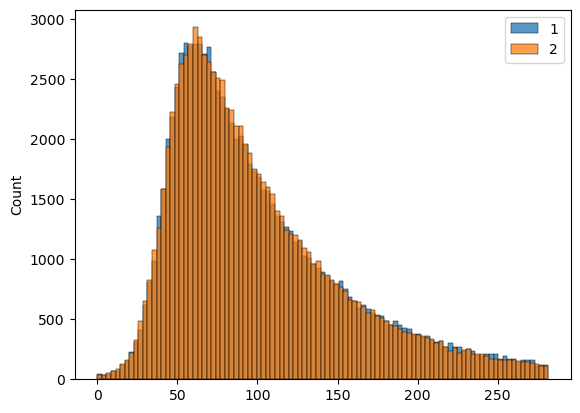

In [9]:
bins = np.linspace(0, np.percentile(df[3].values, 95), 100)
print(np.median(df[3]))

fig, ax = plt.subplots()
sns.histplot(df[3].values, bins=bins, ax=ax, label='1')
sns.histplot(df2[3].values, bins=bins, ax=ax, label='2') # 
ax.legend()

plt.show()

In [10]:
vmin = 0 # np.percentile(img, 5)
vmax = 300 # np.percentile(img, 99)
vmin, vmax

(0, 300)

In [11]:
viewer.add_image(img, colormap='red', blending='additive', name='img', contrast_limits=[0, vmax])

/Users/fangmingxie/miniforge3/envs/routine/lib/python3.10/site-packages/napari/_vispy/layers/image.py:274: UserWarning: data shape (2837, 960, 960) exceeds GL_MAX_TEXTURE_SIZE 2048 in at least one axis and will be downsampled. Rendering is currently in 3D mode.
  warnings.warn(
/Users/fangmingxie/miniforge3/envs/routine/lib/python3.10/site-packages/napari/_vispy/layers/image.py:274: UserWarning: data shape (2837, 960, 960) exceeds GL_MAX_TEXTURE_SIZE 2048 in at least one axis and will be downsampled. Rendering is currently in 3D mode.
  warnings.warn(


<Image layer 'img' at 0x17f612ce0>

In [12]:
viewer.add_image(img2, colormap='green', blending='additive', name='img', contrast_limits=[0, vmax])

/Users/fangmingxie/miniforge3/envs/routine/lib/python3.10/site-packages/napari/_vispy/layers/image.py:274: UserWarning: data shape (2837, 960, 960) exceeds GL_MAX_TEXTURE_SIZE 2048 in at least one axis and will be downsampled. Rendering is currently in 3D mode.
  warnings.warn(


<Image layer 'img [1]' at 0x17f9b71c0>

In [20]:
spots = (df[[0,1,2]]/scaling).iloc[:,[2,1,0]].values
viewer.add_points(spots, size=5, face_color='red', edge_color='white', name='spots', out_of_slice_display=True)

<Points layer 'spots [2]' at 0x4fe6dd4b0>

In [ ]:
spots2 = (df2[[0,1,2]]/scaling).iloc[:,[2,1,0]].values
viewer.add_points(spots2, size=5, face_color='green', edge_color='white', name='spots', symbol='+', out_of_slice_display=True)